In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

## Exercise 1 : Generalized Linear Models with sklearn

In [533]:
### Load the data into pandas Dataframe

wine_df = pd.read_csv("winequality-red.csv", sep=';')

- There are no non-numeric types and no missing values found.

In [534]:
cat_columns = wine_df.select_dtypes(['object']).columns
cat_columns

Index([], dtype='object')

In [535]:
wine_df.isnull().any(axis=0)

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

- Columns with very little correlation with "quality" column are dropped : ['residual sugar','free sulfur dioxide','pH']

<AxesSubplot:>

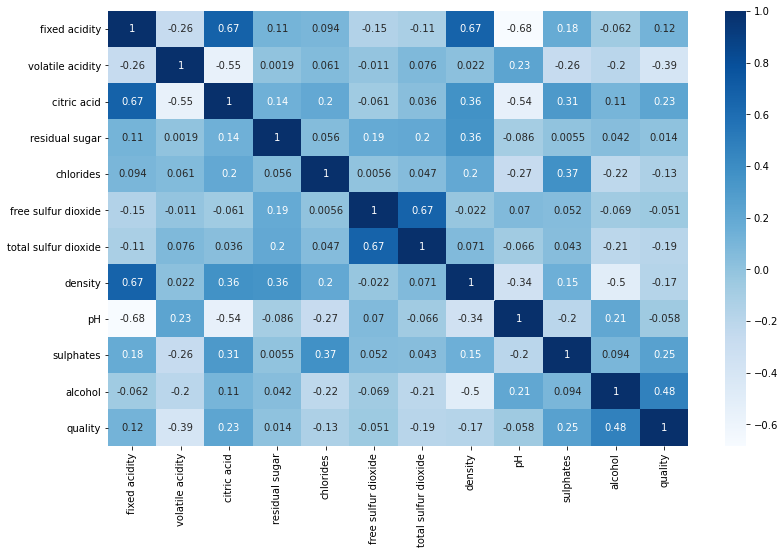

In [536]:
plt.figure(figsize=(13, 8))
sns.heatmap(wine_df.corr(), annot=True, cmap='Blues')

#### Removing irrelevant columns and split dataset into train and test sets

In [537]:
wine_df = wine_df.drop(columns = ['residual sugar','free sulfur dioxide','pH'], axis=1)

In [538]:
train, test = train_test_split(wine_df, test_size=0.2, random_state=42, shuffle=True)

In [539]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

### Ordinary Least Squares

#### Preparing data

In [540]:
## Creating train_x, train_y, test_x and test_y

train_y = train['quality']
train_x = train.drop(columns=['quality'])

test_y = test['quality']
test_x = test.drop(columns=['quality'])

In [541]:
## Mean Normalization of the data
scaler = MinMaxScaler()
train_x = pd.DataFrame(scaler.fit_transform(train_x),
            columns=train_x.columns, index=train_x.index) 

test_x = pd.DataFrame(scaler.fit_transform(test_x),
            columns=test_x.columns, index=test_x.index) 

In [542]:
X = train_x.to_numpy()
Y = train_y.to_numpy()

Y = np.atleast_2d(Y).T

X_test = test_x.to_numpy()
Y_test = test_y.to_numpy()

Y_test = np.atleast_2d(Y_test).T

#X = np.hstack((np.atleast_2d(np.ones(len(X))).T, X))
#X_test = np.hstack((np.atleast_2d(np.ones(len(X_test))).T, X_test))

#### ordinary least squares

In [451]:
## Training the OLS model
reg_ols = linear_model.LinearRegression()
reg_ols.fit(X,Y)

LinearRegression()

In [452]:
## Getting the learned parameters
reg_ols.coef_

array([[ 0.60956829, -1.54398067, -0.17548734, -0.9265405 , -0.60605742,
        -0.30819377,  1.40588103,  1.75053673]])

In [453]:
## making predictions on train set
y_pred = reg_ols.predict(X)
print("Mean squared error on train set: %.2f" % mean_squared_error(Y, y_pred))

## making predictions on test set
y_pred = reg_ols.predict(X_test)
print("Mean squared error on test set: %.2f" % mean_squared_error(Y_test, y_pred))


Mean squared error on train set: 0.43
Mean squared error on test set: 0.39


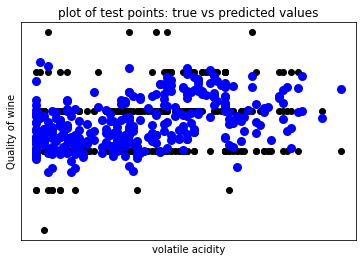

In [454]:
# Plot outputs
plt.scatter(X_test[:,2], Y_test, color="black")
plt.scatter(X_test[:,2], y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel("volatile acidity")
plt.ylabel("Quality of wine")

plt.title("plot of test points: true vs predicted values")

plt.show()

#### Ridge regression

Ridge regression used with three different learning rates: [0.1, 0.001, 0.0013]

In [455]:
alphas = [5, 50, 100]

reg_rid = linear_model.Ridge(alpha=5)
reg_rid.fit(X,Y)

Ridge(alpha=5)

In [456]:
reg_rid.coef_

array([[ 0.42469466, -1.2169094 ,  0.0870391 , -0.58601458, -0.55842146,
        -0.34202276,  0.99055059,  1.58070539]])

In [457]:
## making predictions on train set
y_pred = reg_rid.predict(X)
print("Mean squared error on train set: %.2f" % mean_squared_error(Y, y_pred))

## making predictions on test set
y_pred = reg_rid.predict(X_test)
print("Mean squared error on test set: %.2f" % mean_squared_error(Y_test, y_pred))

Mean squared error on train set: 0.43
Mean squared error on test set: 0.39


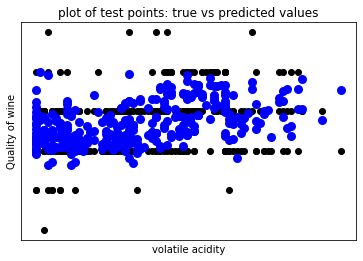

In [458]:
# Plot outputs
plt.scatter(X_test[:,2], Y_test, color="black")
plt.scatter(X_test[:,2], y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel("volatile acidity")
plt.ylabel("Quality of wine")

plt.title("plot of test points: true vs predicted values")

plt.show()

#### Lasso Model

In [459]:
alphas = [0.0001, 0.01, 0.0013]

reg_lass = linear_model.Lasso(alpha=0.8)
reg_lass.fit(X,Y)

Lasso(alpha=0.8)

In [460]:
reg_lass.coef_

array([ 0., -0.,  0., -0., -0., -0.,  0.,  0.])

In [461]:
## making predictions on train set
y_pred = reg_lass.predict(X)
print("Mean squared error on train set: %.2f" % mean_squared_error(Y, y_pred))

## making predictions on test set
y_pred = reg_lass.predict(X_test)
print("Mean squared error on test set: %.2f" % mean_squared_error(Y_test, y_pred))

Mean squared error on train set: 0.65
Mean squared error on test set: 0.66


#### Results of OLS, Ridge Regression and Lasso

| Model Name | hyperparameter value | Train MSE | Test MSE | 
| --- | --- | --- | --- |
| Ordinary Least Squares | None | 0.43 | 0.39 |
| Ridge Regression | alpha = 5 | 0.43 | 0.39 |
| Ridge Regression | alpha = 50 | 0.50 | 0.45 |
| Ridge Regression | alpha = 100 | 0.54 | 0.50 |
| Lasso | alpha = 0.0001 | 0.43 | 0.39 |
| Lasso | alpha = 0.01 | 0.45 | 0.41 |
| Lasso | alpha = 0.3 | 0.65 | 0.66 |

**Explanation**: In the model Lasso, train and test error has increased for alpha = 0.3 that means the model is underfitting, the model is not complex enough to generalize the data points. While the values of alpha = [0.0001, 0.01] are just right for the model. Similarly, in Ridge model, for higher values of alpha -- model is underfitting, hence higher value of train and test MSE.

#### Hyperparameter tuning using GridsearchCV

In [462]:
lasso_params = {'alpha':[0.0013, 0.01, 0.02, 0.024, 0.025, 0.026, 0.03]}
ridge_params = {'alpha':[5, 50, 200, 230, 250,265, 270, 275, 290, 300, 500]}

grid_lasso = GridSearchCV(linear_model.Lasso(), param_grid=lasso_params).fit(X, Y)
best_alpha = grid_lasso.best_estimator_

In [463]:
reg_lass = linear_model.Lasso(alpha=best_alpha.alpha)
reg_lass.fit(X,Y)
## making predictions on train set
y_pred = reg_lass.predict(X)
print("Mean squared error on train set: %.2f" % mean_squared_error(Y, y_pred))

## making predictions on test set
y_pred = reg_lass.predict(X_test)
print("Mean squared error on test set: %.2f" % mean_squared_error(Y_test, y_pred))

Mean squared error on train set: 0.43
Mean squared error on test set: 0.39


In [464]:
grid_ridge = GridSearchCV(linear_model.Ridge(), param_grid=ridge_params).fit(X, Y)
best_alpha = grid_ridge.best_estimator_

In [465]:
reg_rid = linear_model.Ridge(alpha=best_alpha.alpha)
reg_rid.fit(X,Y)
## making predictions on train set
y_pred = reg_rid.predict(X)
print("Mean squared error on train set: %.2f" % mean_squared_error(Y, y_pred))

## making predictions on test set
y_pred = reg_rid.predict(X_test)
print("Mean squared error on test set: %.2f" % mean_squared_error(Y_test, y_pred))

Mean squared error on train set: 0.43
Mean squared error on test set: 0.39


**MSE obtained for both Lasso and Ridge models on the test set** : 0.39

In [466]:
grid_lasso.cv_results_

{'mean_fit_time': array([0.00130959, 0.00074077, 0.00067348, 0.00070901, 0.00069394,
        0.0007441 , 0.00065331]),
 'std_fit_time': array([4.11185598e-04, 4.35143627e-05, 3.34719307e-05, 6.57164647e-05,
        3.11749410e-05, 5.53235916e-05, 3.11325370e-05]),
 'mean_score_time': array([0.00052037, 0.00037055, 0.00035219, 0.00034966, 0.00036373,
        0.00038238, 0.0003202 ]),
 'std_score_time': array([8.52229004e-05, 2.73387839e-05, 4.83063107e-05, 2.03775231e-05,
        3.66621111e-05, 5.51540868e-05, 6.06727270e-06]),
 'param_alpha': masked_array(data=[0.0013, 0.01, 0.02, 0.024, 0.025, 0.026, 0.03],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.0013},
  {'alpha': 0.01},
  {'alpha': 0.02},
  {'alpha': 0.024},
  {'alpha': 0.025},
  {'alpha': 0.026},
  {'alpha': 0.03}],
 'split0_test_score': array([0.25702903, 0.20122818, 0.1657226 , 0.14682057, 0.14141093,
        0.13572762, 0.1

In [467]:
grid_ridge.cv_results_

{'mean_fit_time': array([0.00179353, 0.00081892, 0.00067949, 0.00067105, 0.00077009,
        0.00089498, 0.00073528, 0.00060792, 0.00060582, 0.0005918 ,
        0.00055237]),
 'std_fit_time': array([1.00420784e-03, 5.88128716e-05, 4.37779622e-05, 3.38079227e-05,
        1.70872984e-04, 1.08939228e-04, 1.49251630e-04, 5.01790403e-06,
        2.65033110e-05, 5.32992186e-06, 8.08572981e-06]),
 'mean_score_time': array([0.00071907, 0.00040517, 0.00031881, 0.00032454, 0.00034633,
        0.00037837, 0.00033183, 0.00030355, 0.00029149, 0.00028839,
        0.00027423]),
 'std_score_time': array([3.16681518e-04, 4.65778871e-05, 5.04727120e-06, 1.71710378e-05,
        3.82807294e-05, 5.83666991e-05, 4.34917314e-05, 2.69908365e-06,
        7.36184687e-06, 5.76282908e-06, 4.53973016e-06]),
 'param_alpha': masked_array(data=[5, 50, 200, 230, 250, 265, 270, 275, 290, 300, 500],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
    

## Exercise 3 : Implementing Coordinate Descent

#### preparing data

In [487]:
X = train_x.to_numpy()
Y = train_y.to_numpy()

Y = np.atleast_2d(Y).T

X_test = test_x.to_numpy()
Y_test = test_y.to_numpy()

Y_test = np.atleast_2d(Y_test).T

X = np.hstack((np.atleast_2d(np.ones(len(X))).T, X))
X_test = np.hstack((np.atleast_2d(np.ones(len(X_test))).T, X_test))

#### Implementation of Coordinate Descent Algorithm

In [511]:
def minimize_CD(X, Y, imax):
    '''
    Implementation of Coordinate Descent Algorithm
    '''
    # Normalize X
    # = X / np.sqrt(np.sum(np.square(X), axis=0))
    
    # Initialize parameters
    params = np.zeros(len(X[0]))
    
    # Track parameters
    track_params = []

    for i in range(imax):
        for j in range(len(params)):
            r = np.dot(np.delete(X, j, axis=1), np.delete(params, j, axis=0))
            params[j] = np.dot(X[:,j].T, (Y.ravel() - r))/np.sum(np.square(X[:,j]))
            
        track_params.append(params)
               
    return (params, track_params)

In [512]:
def learn_linear_CD(X,Y,X_test, Y_test, imax):
    '''
    This function implements linear regression without regularization and learns parameters
    through application of Coordinate Descent on loss.
    '''
    ## Compute predictions on train and test set
    
    params, track_params = minimize_CD(X, Y, imax)
    Y_hat = np.matmul(X, params)
    Y_hat_test = np.matmul(X_test, params)
    
    test_rmse = np.sqrt((np.sum(np.square(Y_test - Y_hat_test)))/len(X_test))
    train_rmse = np.sqrt((np.sum(np.square(Y - Y_hat)))/len(X))
        
 
    return (train_rmse, test_rmse, track_params)

In [513]:
imax = 25
(train_rmse, test_rmse, track_params) = learn_linear_CD(X,Y,X_test, Y_test, imax)

In [514]:
train_rmse

33.548929337715805

In [515]:
test_rmse


18.100290600894528

In [516]:
track_params

[array([ 5.13033910e+00,  1.97801464e-02, -1.45667982e+00, -2.85191840e-03,
        -8.83209139e-01, -5.97715788e-01,  3.90769902e-01,  1.40448074e+00,
         2.08282902e+00]),
 array([ 5.13033910e+00,  1.97801464e-02, -1.45667982e+00, -2.85191840e-03,
        -8.83209139e-01, -5.97715788e-01,  3.90769902e-01,  1.40448074e+00,
         2.08282902e+00]),
 array([ 5.13033910e+00,  1.97801464e-02, -1.45667982e+00, -2.85191840e-03,
        -8.83209139e-01, -5.97715788e-01,  3.90769902e-01,  1.40448074e+00,
         2.08282902e+00]),
 array([ 5.13033910e+00,  1.97801464e-02, -1.45667982e+00, -2.85191840e-03,
        -8.83209139e-01, -5.97715788e-01,  3.90769902e-01,  1.40448074e+00,
         2.08282902e+00]),
 array([ 5.13033910e+00,  1.97801464e-02, -1.45667982e+00, -2.85191840e-03,
        -8.83209139e-01, -5.97715788e-01,  3.90769902e-01,  1.40448074e+00,
         2.08282902e+00]),
 array([ 5.13033910e+00,  1.97801464e-02, -1.45667982e+00, -2.85191840e-03,
        -8.83209139e-01, -5.9

**Note on the progression of feature values against iterations** - There is no change in features values with iterations

### Coordinate descent with L1 regularization

In [495]:
def lasso_CD(X, Y, l1, path_length=100, esp=1e-6):
    '''
    Implementation of lasso regression with Coordinate Descent Optimization
    Inspired from this post: https://towardsdatascience.com/regularized-linear-regression-models-dcf5aa662ab9
    '''
    m, n = np.shape(X)
    B_star = np.zeros(len(X[0]))
    l_max = max(list(abs(np.dot(np.transpose(X[:, 1:]), Y)))) / m
    
    if l1 >= l_max:
        return np.append(np.mean(Y), np.zeros((n - 1)))
    l_path = np.geomspace(l_max, l1, path_length)
    coefficients = np.zeros((len(l_path), n))
    for i in range(len(l_path)):
        while True:
            B_s = B_star
            for j in range(n):
                k = np.where(B_s != 0)[0]
                update = (1/m)*((np.dot(X[:,j], Y)- \
                                np.dot(np.dot(X[:,j], X[:,k]), B_s[k]))) + \
                                B_s[j]
                B_star[j] = (np.sign(update) * max(abs(update) - l_path[i], 0))
                
            if np.all(abs(B_s - B_star) < esp):
                coefficients[i, :] = B_star
                break
                
    return (B_star, l_path, coefficients)

In [501]:
(params, l_path, coefficients) = lasso_CD(X, Y, 0.01)

#### testing the model

In [502]:
Y_hat = np.matmul(X, params)
Y_hat_test = np.matmul(X_test, params)

test_rmse = np.sqrt((np.sum(np.square(Y_test - Y_hat_test)))/len(X_test))
train_rmse = np.sqrt((np.sum(np.square(Y - Y_hat)))/len(X))
print("train rmse:", train_rmse)
print("test rmse:", test_rmse)

train rmse: 29.607921286595158
test rmse: 15.046564261449447


#### Progression of features shown below (I have chosen half of the features to keep clarity in the figure)

(0.007551526173863397,
 3.641418780213813,
 -0.26986860158462966,
 5.667240633277223)

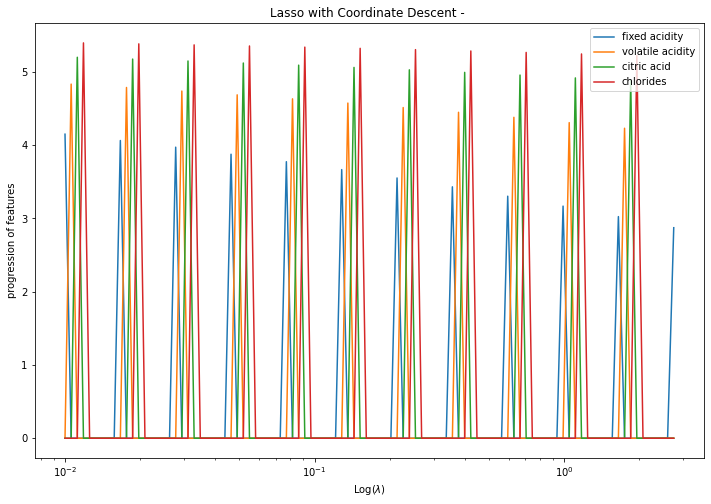

In [509]:
# Display results
plt.figure(figsize = (12,8))

coefficients = coefficients.reshape((9,100))


for i in range(4):
    plt.plot(l_path, coefficients[i], label = train.columns[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('progression of features')
plt.title('Lasso with Coordinate Descent - ')
plt.legend()
plt.axis('tight')

### Comparison between regularized and unregularized CD

**Test rmse with regularization** : 15.04, 
**Test rmse without regularization** : 18.10

## Exercise 2 : Higher Order Polynomial Regression

#### Generate dataset D1

In [2]:
X = np.random.normal(loc = 0.05,scale = 1,size=100).reshape(1,-1)

#### Task A
**NOTE**: Could not complete task for higher degrees because of resource limitation

In [3]:
Y = 1.3*np.square(X) + 4.8*X + 8 + np.random.randint((100))

In [6]:
## Generate polynomial features
y_pred = []
degrees = [3]
for d in degrees:
    
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    
    
    reg = linear_model.LinearRegression()
    reg.fit(X_poly,Y)
    
    ## making predictions on train set
    y_pred = reg.predict(X_poly)
    print("Mean squared error on train set: %.2f" % mean_squared_error(Y, y_pred))

Mean squared error on train set: 0.00


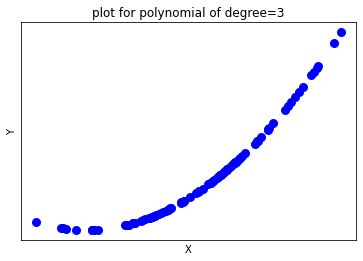

In [7]:
# Plot outputs
plt.scatter(X, Y, color="black")
plt.scatter(X, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel("X")
plt.ylabel("Y")

plt.title("plot for polynomial of degree=3")

plt.show()

### Task B

In [19]:
X = np.random.normal(loc = 0.05,scale = 1,size=500).reshape(1,-1)

In [20]:
Y = 1.3*np.square(X) + 4.8*X + 8

In [24]:
y_pred = []
for lamda in [0.1]:

    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)


    reg = linear_model.Ridge(alpha = lamda)
    reg.fit(X_poly,Y)

    ## making predictions on train set
    y_pred = reg.predict(X_poly)

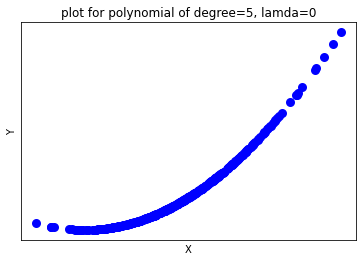

In [25]:
# Plot outputs
plt.scatter(X, Y, color="black")
plt.scatter(X, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel("X")
plt.ylabel("Y")

plt.title("plot for polynomial of degree=5, lamda=0")

plt.show()

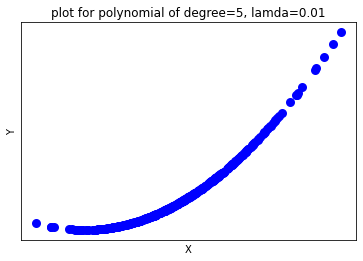

In [26]:
# Plot outputs
plt.scatter(X, Y, color="black")
plt.scatter(X, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel("X")
plt.ylabel("Y")

plt.title("plot for polynomial of degree=5, lamda=0.01")

plt.show()

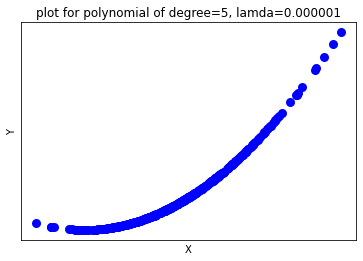

In [27]:
# Plot outputs
plt.scatter(X, Y, color="black")
plt.scatter(X, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel("X")
plt.ylabel("Y")

plt.title("plot for polynomial of degree=5, lamda=0.000001")

plt.show()

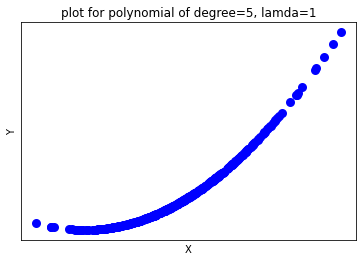

In [28]:
# Plot outputs
plt.scatter(X, Y, color="black")
plt.scatter(X, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel("X")
plt.ylabel("Y")

plt.title("plot for polynomial of degree=5, lamda=1")

plt.show()